<div style="background-color: black; color: white; padding: 10px;text-align: center;">
  <strong>Date Published:</strong> October 12, 2025 <strong>Author:</strong> Adnan Alaref
</div>

# **Explanation: The Median Filter**

The **Median Filter** is a powerful **non-linear digital filtering technique** commonly used in image processing to reduce **impulse noise** (often called "salt-and-pepper" noise).

Unlike the average filter (like Gaussian or Box blur) which uses the mean of the surrounding pixel values, the Median Filter works by replacing a pixel's value with the **median** of all the pixel values within a neighborhood defined by a **kernel** (e.g., a 5x5 square).

### How It Works:

For every pixel in the image:

1.  It considers the values of its neighbors within the specified kernel size (e.g., 25 pixels for a 5x5 kernel).
2.  It sorts these pixel values from smallest to largest.
3.  It selects the **middle value** (the median) from the sorted list.
4.  It replaces the original pixel's value with this median value.

### Key Advantage:

Because the median is chosen from the existing pixel values, the filter is highly effective at **removing sharp, isolated noise spikes** (like pure white or pure black dots) while **preserving the sharp edges** of objects in the image. Linear filters tend to blur these edges.

In [1]:
# !pip install opencv-python-headless > /dev/null 2>&1
# !pip install --upgrade --force-reinstall numpy  > /dev/null 2>&1

# **Step 1: Import Libraries.**

In [2]:
import os
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import warnings
warnings.filterwarnings(action='ignore')
warnings.simplefilter(action='ignore' ,category=FutureWarning)
cv2.__version__

'4.12.0'

### 🧠 Quick Takeaway

| **Command**      | **Works in Colab** | **Works in Kaggle** | **GUI Needed** |
|:------------------|:------------------:|:-------------------:|:--------------:|
| `cv2.imshow()`    | ❌                | ❌                 | ✅             |
| `cv2_imshow()`    | ✅                | ❌                 | ❌             |
| `plt.imshow()`    | ✅                | ✅                 | ❌             |


# **Step 2: Read Image.**

In [3]:
path = r'/kaggle/input/cat-image/cat.jpg'
image = cv2.imread(path)
# Resize to 224×224 pixels
resized_image = cv2.resize(image, (224, 224))

print(image is None)
print(f'Image type:{type(image)}')
print("Original shape:", image.shape)
print("Resized shape:", resized_image.shape)
#cv2_imshow(image) # cv2_imshow() use only for colab , cv2.imshow() not work need GUI

False
Image type:<class 'numpy.ndarray'>
Original shape: (1200, 1920, 3)
Resized shape: (224, 224, 3)


# **Step 3: Try MedianBlur.**

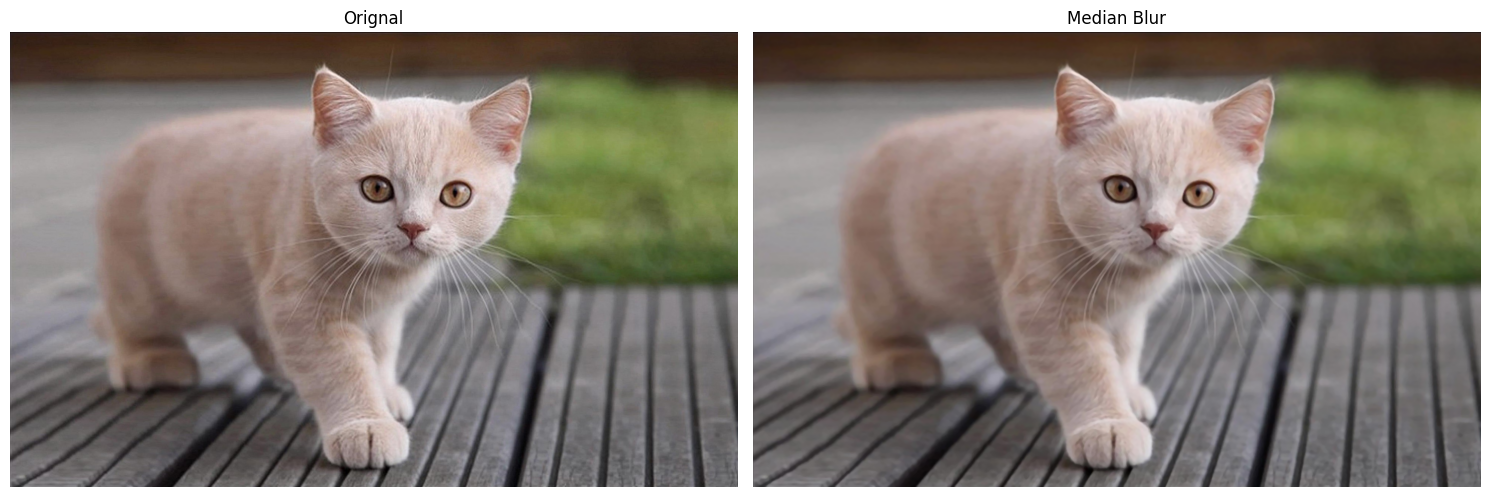

In [4]:
# Read the image
img = cv2.imread(path)

# Apply median blur three time
img_blur1 = cv2.medianBlur(img,5)
img_blur2 = cv2.medianBlur(img_blur1,5)
img_blur3 = cv2.medianBlur(img_blur2,5)
# img_blur = cv2.medianBlur(img,15)


# Convert BGR -> RGB
img_blur = cv2.cvtColor(img_blur3, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display Orignal Image
fig ,axes = plt.subplots(1,2,figsize=(15,5))
axes[0].imshow(img)
axes[0].set_title("Orignal")
axes[0].axis("off")

# Display Blured Image
axes[1].imshow(img_blur)
axes[1].set_title("Median Blur")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# **Step 4: Try MedianBlur With different Kernel size.**

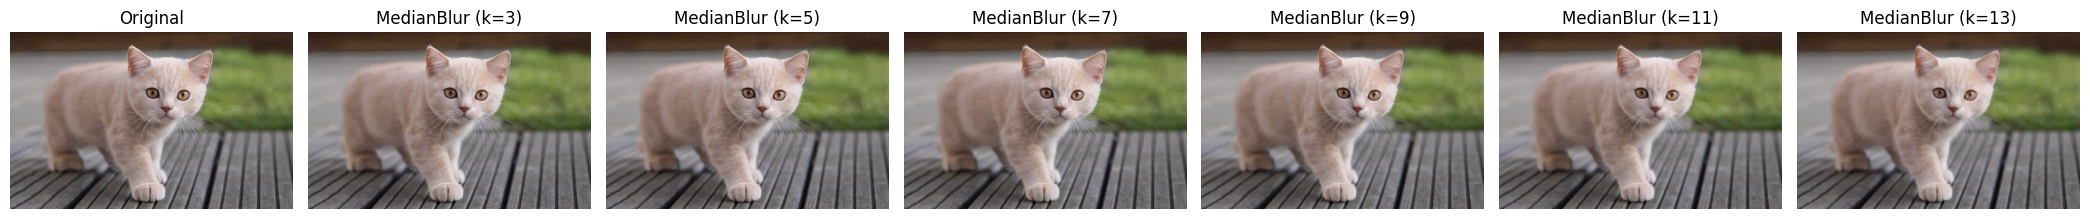

In [5]:
# Read the image
img = cv2.imread(path)

# Kernels size
kernel_sizes = [3, 5, 7, 9, 11, 13]

# Apply median blurs for each kernel size
blurred_images = [cv2.medianBlur(img,k) for k in kernel_sizes]

# Combine original + blurred images for plotting
images = [img]+blurred_images

# Convert all images from BGR → RGB for Matplotlib
images_rgb = [cv2.cvtColor(img,cv2.COLOR_BGR2RGB) for img in images]

# Create subplots
cols = len(images)
fig, axes = plt.subplots(1,cols, figsize = (3*cols,5))
titles = ["Original"]+[f"MedianBlur (k={k})" for k in kernel_sizes]

# Plot each image
for ax,im, title in zip(axes,images_rgb,titles):
  ax.imshow(im)
  ax.set_title(title)
  ax.axis('off')

plt.tight_layout()
plt.show()

# **Step 5: Its effect on images with noise.**

### **Median Blur works on salt-and-pepper noise.**
- **This type of noise (random black and white dots) is most affected by the Median filter.**
- If your image is already clean, the filter won't significantly alter it.
- If you want to see the effect, try adding **artificial noise** to your image before filtering.

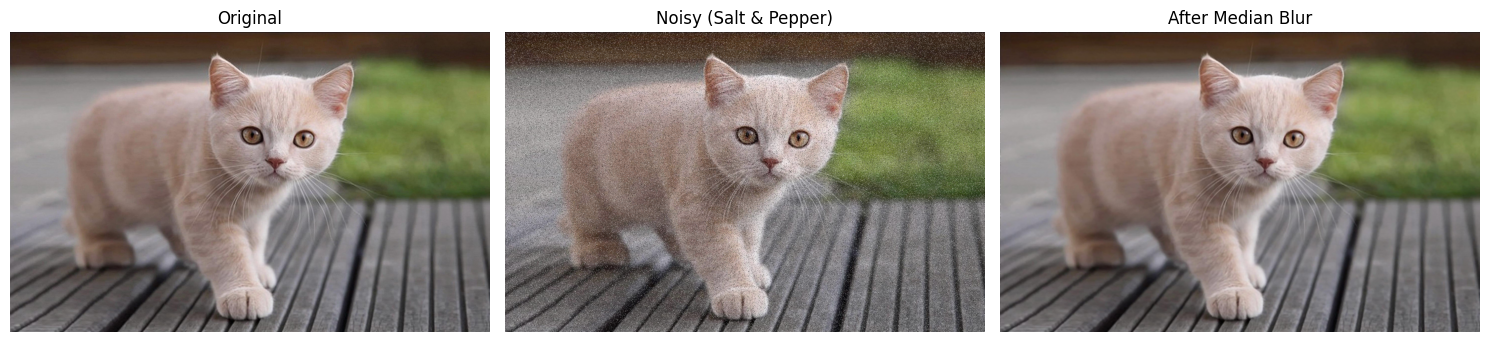

In [6]:
def add_salt_pepper_noise(img, prob=0.02):
  """Add salt-and-pepper noise to an RGB image."""
  noisy = img.copy()
  h,w,c = img.shape
  # Add salt-and-pepper noise
  mask = np.random.choice([0,1,2],
                          size = (h,w),
                          p=[1-prob, prob/2,prob/2])
  noisy[mask==1] = 255 # slat
  noisy[mask==2] = 0 # pepper

  return noisy


# Read the image
img = cv2.imread(path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
noisy = add_salt_pepper_noise(img_rgb,prob=0.1)

# Apply Median Blur
blurred = cv2.medianBlur(cv2.cvtColor(noisy, cv2.COLOR_RGB2BGR), 5)
blurred = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Original', 'Noisy (Salt & Pepper)', 'After Median Blur']

for ax, im, title in zip(axes, [img_rgb, noisy, blurred], titles):
    ax.imshow(im)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
# --- Locate image ---
!find /kaggle/input -type f
print("Path exists:", os.path.exists(path))

/kaggle/input/cat-image/cat.jpg
Path exists: True


In [8]:
im = cv2.imread(path)
print("Type:", type(im))
print("is ndarray:", isinstance(im, np.ndarray))

Type: <class 'numpy.ndarray'>
is ndarray: True


# **Step 6: Applay more than one Filiter over image.**

#### 💡 NOTE: cv2.filter2D(src=img,ddepth=-1, kernel=_kernel)
```text
  💡 When you use ddepth = -1
  It means:
  🟢 "Keep the same depth (data type) as the source image."
```

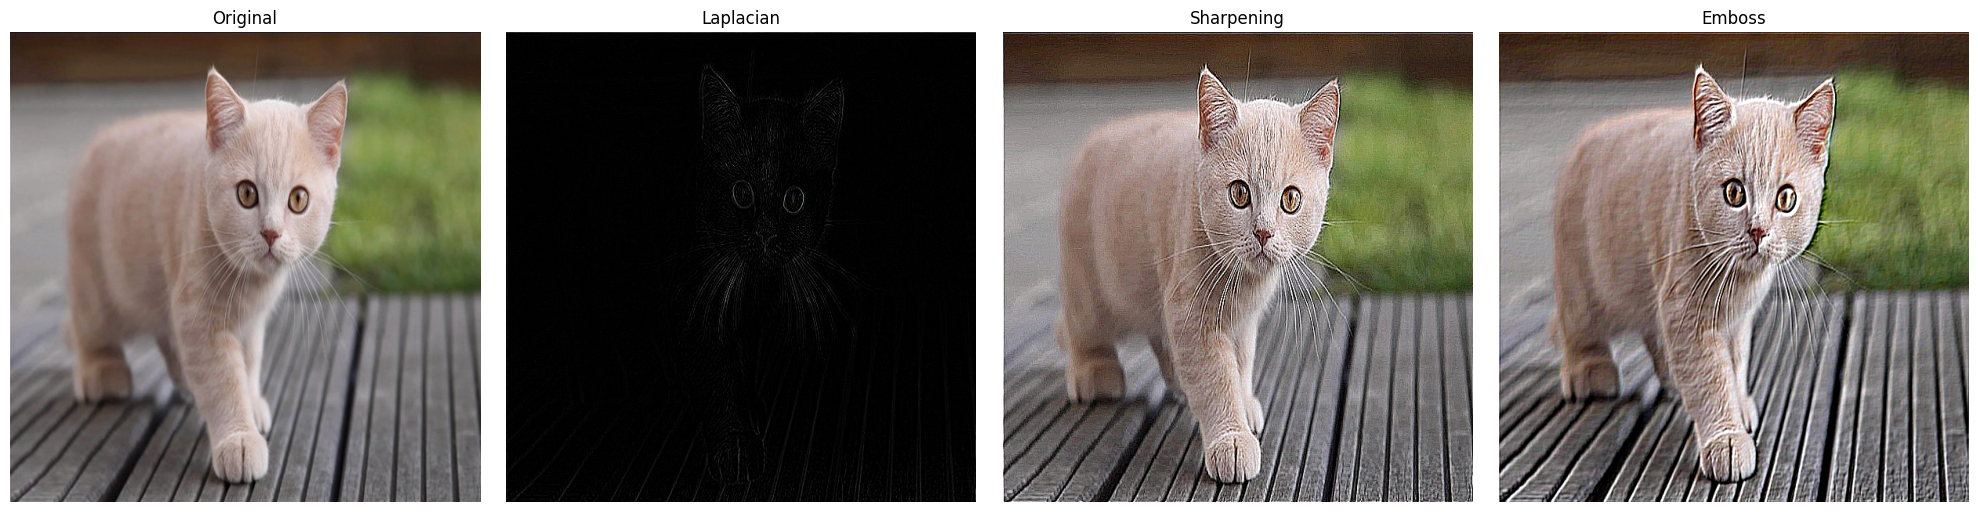

In [9]:
# ----------------------------------------------------------------------
# 1. Function Definition
# ----------------------------------------------------------------------
def apply_custom_filter(img, _kernel):
    
    # Force C-contiguous layout for performance/safety
    img = np.ascontiguousarray(img)
    _kernel = np.ascontiguousarray(_kernel,dtype=np.float32)

    # Apply the 2D convolution
    new_img = cv2.filter2D(src=img,ddepth=-1, kernel=_kernel)
    return new_img


# ----------------------------------------------------------------------
# 2. Image Loading and Preprocessing 
# ----------------------------------------------------------------------
# Read the image
image = cv2.imread(path)

if image is None:
    raise FileNotFoundError("Could not load image at " + path)
else:
    # Resize the image
    image = cv2.resize(image,(600,600))
    # The resize function might return a UMat if T-API is enabled, causing the downstream error.
    if hasattr(image, 'get'):
        image = image.get() 

# ----------------------------------------------------------------------
# 3. Define kernels
# ----------------------------------------------------------------------
laplacian_kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
], dtype=np.float32)

sharpening_kernel = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
], dtype=np.float32)

emboss_kernel = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
], dtype=np.float32)

# ----------------------------------------------------------------------
# 4. Apply filters
# ----------------------------------------------------------------------
lap_img = apply_custom_filter(image, laplacian_kernel)
sharp_img = apply_custom_filter(image, sharpening_kernel)
emboss_img = apply_custom_filter(image, emboss_kernel)

# ----------------------------------------------------------------------
# 5. Plotting
# ----------------------------------------------------------------------
# Combine original + blurred images for plotting
images = [image,lap_img,sharp_img,emboss_img]
titles = ['Original', 'Laplacian', 'Sharpening', 'Emboss']

# Convert all images from BGR → RGB for Matplotlib
images_rgb = [cv2.cvtColor(img,cv2.COLOR_BGR2RGB) for img in images]

# Create Subplots
cols = len(images)
fig, axes = plt.subplots(1,cols,figsize = (5*cols,5))

# Plot each image
for ax,im,title in zip(axes, images_rgb,titles):
  ax.imshow(im)
  ax.set_title(title)
  ax.axis('off')

plt.tight_layout()
plt.show()

<a id="Import"></a>
<p style="background-color: #000000; font-family: 'Verdana', sans-serif; color: #FFFFFF; font-size: 160%; text-align: center; border-radius: 25px; padding: 12px 20px; margin-top: 20px; border: 2px solid transparent; background-image: linear-gradient(black, black), linear-gradient(45deg, #FF00FF, #00FFFF, #FFFF00, #FF4500); background-origin: border-box; background-clip: content-box, border-box; box-shadow: 0px 4px 20px rgba(255, 105, 180, 0.8);">
   Thanks & Upvote ❤️</p>